In [1]:
# Machine Learning Assignment 1 Solutions
# @Author: Ganesan Santhanam
# Question - 1
import numpy as np
from numpy.linalg import inv
MAX = 10
phi = np.random.randint(MAX, size=(40, 10))
psi = np.random.randint(MAX, size=(40, 1))
phi_transpose = phi.transpose()

In [2]:
theta_star = np.matmul(np.matmul(inv(np.matmul(phi_transpose,phi)),phi_transpose),psi)
product_two = np.matmul(phi,theta_star)
result = np.subtract(product_two,psi)
theta_star_error = np.linalg.norm(result) ** 2
print("-"*10 +" Least Square for psi and phi "+ "-"*10)
print(theta_star)
print("-"*10 +" Error "+ "-"*10)
print(theta_star_error)

---------- Least Square for psi and phi ----------
[[ 0.14694735]
 [ 0.29757572]
 [-0.07613489]
 [-0.08364457]
 [ 0.00313845]
 [ 0.0814208 ]
 [ 0.02673186]
 [ 0.22468931]
 [ 0.19529249]
 [ 0.04894043]]
---------- Error ----------
359.40013168438935


In [3]:
print("-"*10 +"Difference between least square error and modified lease square error with 100 simulations of del "+ "-"*10)
for _ in range(100):
    dell = np.random.randint(MAX, size=(10, 1))
    theta_star_plus_dell = np.add(theta_star,dell)
    product_one = np.matmul(phi,theta_star_plus_dell)
    result_2 = np.subtract(product_one,psi)
    modified_theta_star_error = np.linalg.norm(result_2) ** 2 
    error_difference = theta_star_error - modified_theta_star_error
    if(error_difference>=0):
        print("Theta_star is not the least square solution")
    print(error_difference)
print("As none of the simulation gave a better solution than least squares hence the inequality is true")

----------Difference between least square error and modified lease square error with 100 simulations of del ----------
-1280961.9999999998
-2764406.0000000005
-1704108.0
-1632579.0000000005
-2794812.0
-2820741.0000000005
-2370558.9999999995
-1113484.0
-1793913.0
-2378728.0000000005
-1654242.9999999998
-2495983.0000000005
-1517022.9999999998
-397444.99999999994
-1118132.0000000002
-1415049.9999999995
-1616647.0
-1489118.0000000002
-1634086.0000000002
-1541119.0000000002
-1380104.9999999998
-1905769.9999999998
-2768119.0000000005
-1978450.0000000002
-1786329.9999999998
-2341916.0
-910344.0000000001
-690462.0000000001
-1099675.9999999998
-2243578.000000001
-600667.0000000001
-1815586.9999999995
-1390511.0
-736404.9999999998
-1875966.9999999998
-466794.0
-1160176.9999999998
-1392026.9999999998
-1561059.9999999998
-1510008.9999999998
-1847799.0000000002
-980845.0000000002
-464023.00000000006
-1192277.0
-2591723.0
-3398478.9999999995
-1494876.0
-2101841.0
-1180822.0
-1251660.9999999995
-3753

In [2]:
# Question - 6
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score as accuracy
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer as TFIDF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
X_train_df = pd.read_csv(r"C:\\Users\\ganes\\Desktop\\UFLStuff\\Spring 2022\\CAP6610 - Machine Learning\\homework\\20news-bydate\\matlab\\train.data", sep=' ', encoding='latin',header=None,names=['Document_ID', 'Word_ID', 'Word_Frequency'])
X_test_df = pd.read_csv(r"C:\\Users\\ganes\\Desktop\\UFLStuff\\Spring 2022\\CAP6610 - Machine Learning\\homework\\20news-bydate\\matlab\\test.data", sep = ' ', encoding='latin',header=None,names=['Document_ID', 'Word_ID', 'Word_Frequency'])
Y_train = pd.read_csv(r"C:\\Users\\ganes\\Desktop\\UFLStuff\\Spring 2022\\CAP6610 - Machine Learning\\homework\\20news-bydate\\matlab\\train.label", names=['labels'])
Y_test = pd.read_csv(r"C:\\Users\\ganes\\Desktop\\UFLStuff\\Spring 2022\\CAP6610 - Machine Learning\\homework\\20news-bydate\\matlab\\test.label", names=['lables'])

In [5]:
intermediate_result = X_train_df.groupby('Word_ID').filter(lambda row: row.Word_Frequency.sum()>999)
Word_ID_array = intermediate_result['Word_ID'].unique()
X_train = np.zeros([X_train_df["Document_ID"].unique().shape[0],np.shape(Word_ID_array)[0]],dtype=int)
for i,row in X_train_df.iterrows():
    if(row["Word_ID"] in Word_ID_array):
        X_train[row["Document_ID"]-1][np.where(Word_ID_array==row["Word_ID"])] = row["Word_Frequency"]

In [6]:
test_intermediate_result = X_test_df.groupby('Word_ID').filter(lambda row: row.Word_Frequency.sum()>999)
X_test = np.zeros([X_test_df["Document_ID"].unique().shape[0],np.shape(Word_ID_array)[0]],dtype=int)
for i,row in X_test_df.iterrows():
    if(row["Word_ID"] in Word_ID_array):
        X_test[row["Document_ID"]-1][np.where(Word_ID_array==row["Word_ID"])] = row["Word_Frequency"]

In [24]:
NaiveBayesBN = BernoulliNB()
NaiveBayesBN.fit(X_train,Y_train["labels"].to_numpy())
Y_prediction_BernoulliNB = NaiveBayesBN.predict(X_test)
NaiveBayes_accuracy = accuracy(Y_test, Y_prediction_BernoulliNB)

In [25]:
NaiveBayesMultinomial = MultinomialNB()
NaiveBayesMultinomial.fit(X_train,Y_train["labels"].to_numpy())
Y_Prediction_MultinomialNB = NaiveBayesMultinomial.predict(X_test)
NaiveBayesMultinomial_accuracy = accuracy(Y_test, Y_Prediction_MultinomialNB)

In [12]:
tfidf = TFIDF()
TFIDF_X_train = tfidf.fit_transform(X_train)
TFIDF_X_test = tfidf.transform(X_test)

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(TFIDF_X_train.toarray(),Y_train["labels"].to_numpy())
Y_Prediction_LinearDiscriminantAnalysis = lda.predict(TFIDF_X_test.toarray())
LinearDiscriminantAnalysis_accuracy = accuracy(Y_test, Y_Prediction_LinearDiscriminantAnalysis)

In [26]:
LS_X_train = np.concatenate((TFIDF_X_train.toarray(),np.ones((TFIDF_X_train.shape[0],1))),axis=1)
LS_X_test = np.concatenate((TFIDF_X_test.toarray(),np.ones((TFIDF_X_test.shape[0],1))),axis=1)
LinearClassifier = OneVsRestClassifier(LinearRegression())
LinearClassifier.fit(LS_X_train,Y_train["labels"].to_numpy())
Y_Prediction_OneVsRestClassifier = LinearClassifier.predict(LS_X_test)
LinearClassifier_accuracy = accuracy(Y_test, Y_Prediction_OneVsRestClassifier)

In [16]:
print("NaiveBayes_accuracy:" +str(NaiveBayes_accuracy))
print("NaiveBayesMultinomial_accuracy:"+str(NaiveBayesMultinomial_accuracy))
print("LinearDiscriminantAnalysis_accuracy:"+str(LinearDiscriminantAnalysis_accuracy))
print("LinearClassifier_accuracy:"+str(LinearClassifier_accuracy))

NaiveBayes_accuracy:0.2826115922718188
NaiveBayesMultinomial_accuracy:0.392271818787475
LinearDiscriminantAnalysis_accuracy:0.4146568954030646
LinearClassifier_accuracy:0.4157228514323784


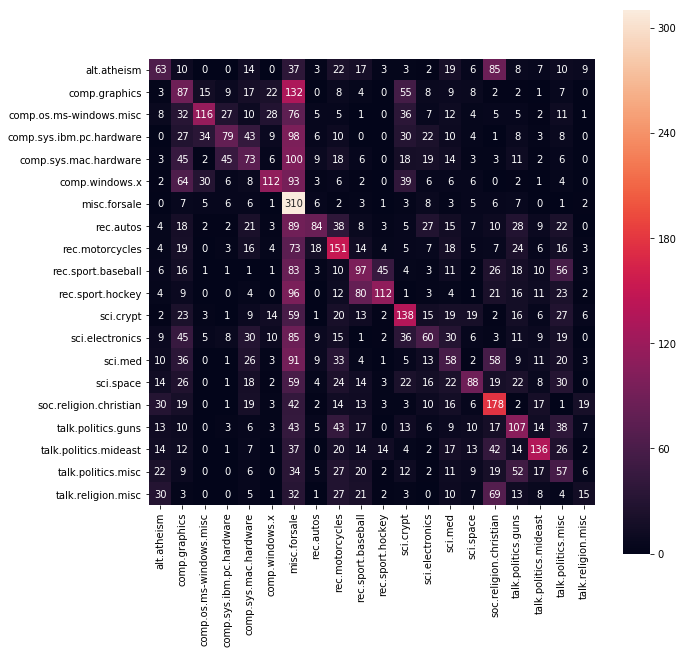

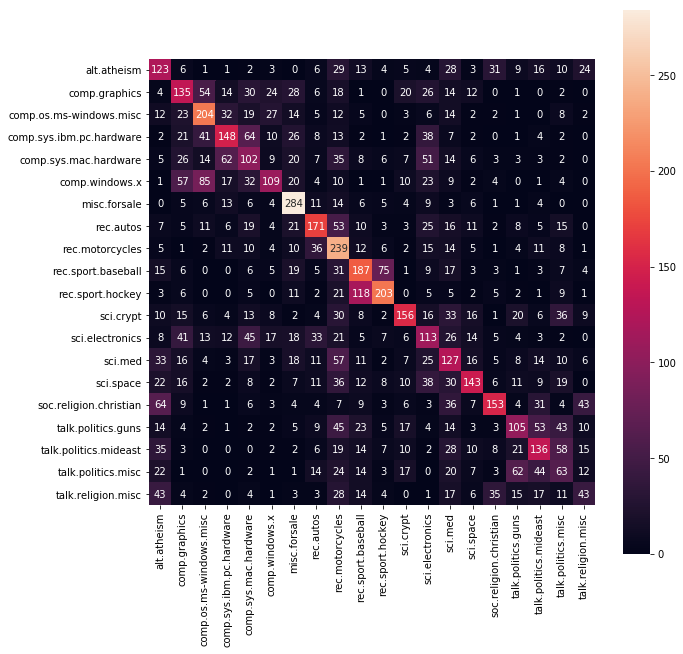

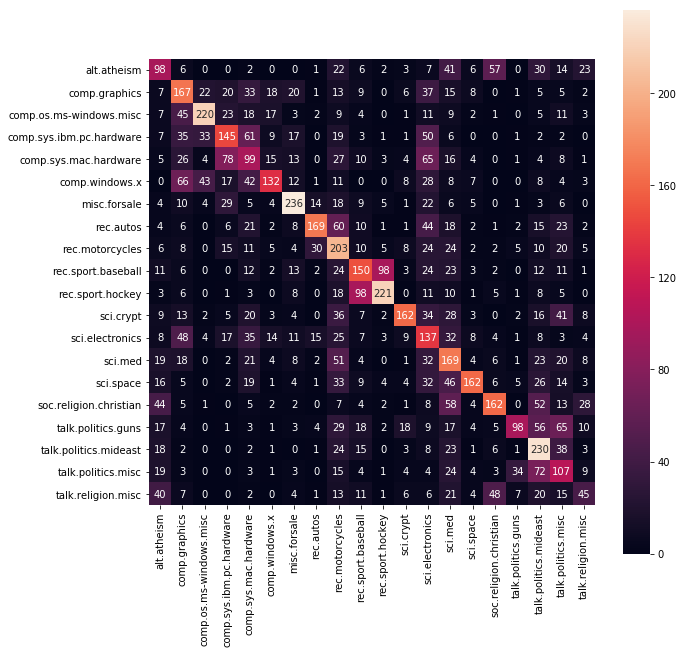

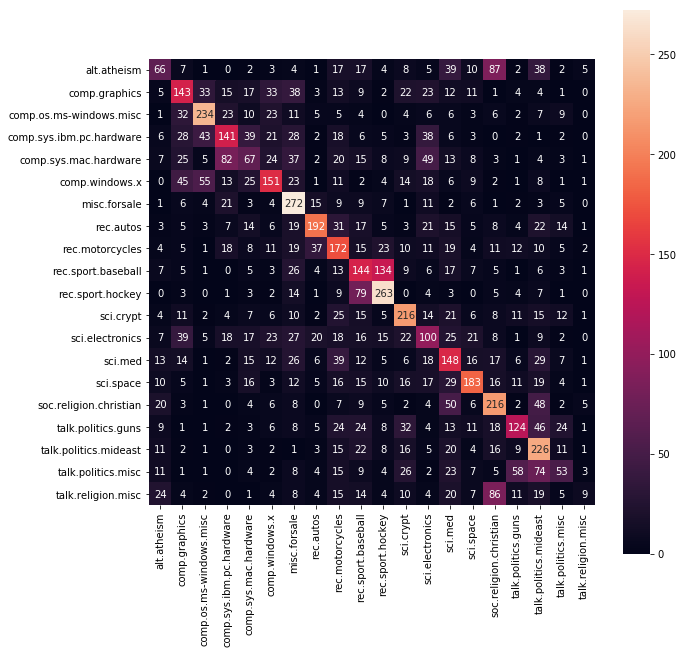

In [27]:

labels = ['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x','misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space','soc.religion.christian','talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc']
for i in [Y_prediction_BernoulliNB,Y_Prediction_MultinomialNB,Y_Prediction_LinearDiscriminantAnalysis,Y_Prediction_OneVsRestClassifier]:
    cm  = confusion_matrix(Y_test,i)
    cm_matrix = pd.DataFrame(data=cm,columns=labels,index=labels)
    plt.figure(figsize = (10, 10))
    sns.heatmap(cm_matrix, annot=True, square=True, fmt='d')#, cmap='YlGnBu')